In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import numpy as np
import sympy as sp
from scipy.signal import group_delay
from scipy.fftpack import fftshift
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Un cero

### 1.1.- Real
Un cero moviéndose por la recta real $y[n]=b_0x[n]+b_1x[n-1], H(z)=b_0(1+b_1/b_0z^{-1}), z_0=b_1/b_0$

In [2]:
def f1(b0=0, b1=0):
    omega = np.linspace(-pi, pi, 512, endpoint=True)
    H = b0 + b1*np.exp(-1j*omega)
    plt.figure(figsize=(20, 4))
    plt.subplot(1,3,1)
    plt.plot(omega, np.abs(H), 'b')
    plt.axis([omega[0], omega[-1], -0.1, 2.1])
    plt.axhline(0, color='k')
    plt.title('Respuesta en amplitud', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel('amplitud', size=12)
    
    plt.subplot(1,3,2)
    pH = np.unwrap(np.angle(H))
    plt.plot(omega, pH, 'b')
    plt.axis([omega[0], omega[-1], -2*pi-0.1, 2*pi+0.1])
    plt.axhline(0, color='k')
    plt.title('Respuesta en fase', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel('fase (rad)', size=12)
    
    plt.subplot(1,3,3)
    gd = b1*(b0*np.cos(omega) + b1)/(b0**2 + 2*b0*b1*np.cos(omega) + b1**2)
    plt.plot(omega, gd, 'b')
    plt.axis([omega[0], omega[-1], -25, 25])
    plt.axhline(0, color='k')
    plt.title('Retardo de grupo', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel(r'$\tau$ (muestras)', size=12)

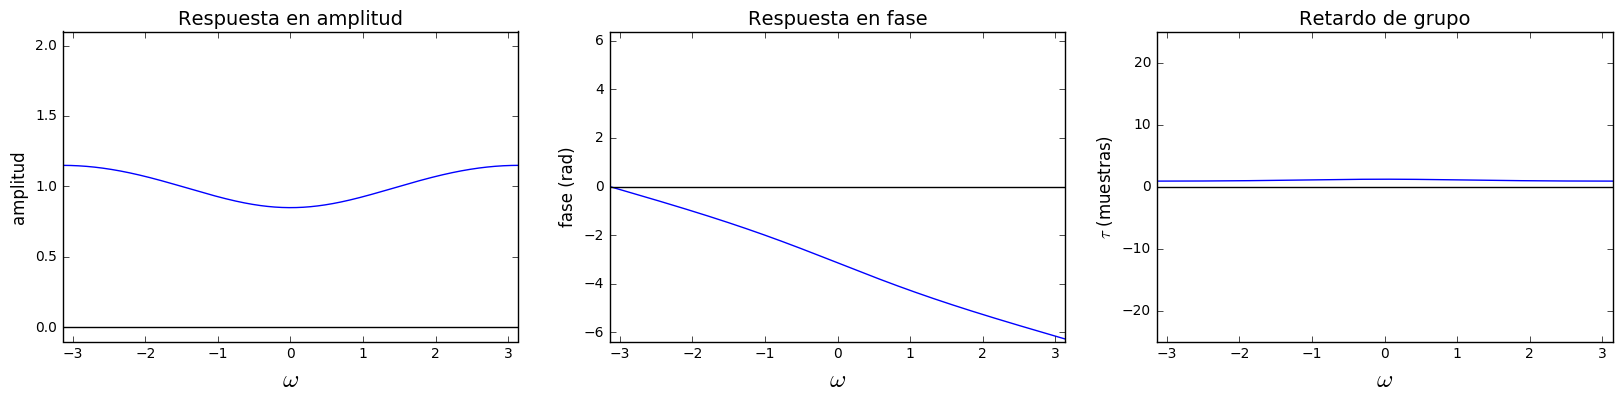

In [3]:
interact(f1, b0=(-1, 1, 0.05), b1=(-1, 1, 0.05))

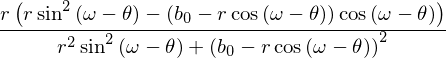

In [4]:
sp.init_printing()
om, theta, b0, b1, r = sp.symbols('omega theta b0 b1 r', real=True)
z1 = r*sp.exp(sp.I*theta)
Hs = b0 - z1*sp.exp(-sp.I*om)
gds = -sp.diff(sp.arg(Hs), om)
sp.simplify(gds)